# Customer Churn Analysis

## 1.Dataset loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 2.Checking basic details

In [6]:
df.shape

(7043, 21)

In [7]:
df = df.drop('customerID', axis = 1)

In [8]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 3.EDA

In [10]:
for i in df.columns:
  print(df[i].value_counts())
  print("-------------------------------")

Male      3555
Female    3488
Name: gender, dtype: int64
-------------------------------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
-------------------------------
No     3641
Yes    3402
Name: Partner, dtype: int64
-------------------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
-------------------------------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
-------------------------------
Yes    6361
No      682
Name: PhoneService, dtype: int64
-------------------------------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-------------------------------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
-------------------------------
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: in

<AxesSubplot:xlabel='Churn', ylabel='count'>

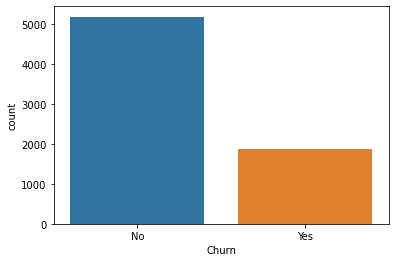

In [11]:
sns.countplot(x ='Churn',data = df)

<AxesSubplot:xlabel='gender', ylabel='count'>

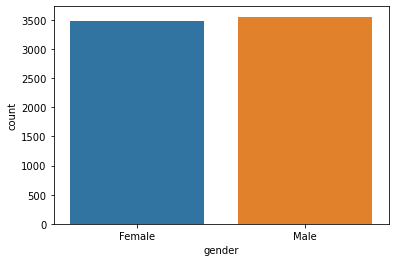

In [12]:
sns.countplot(x ='gender',data = df)

In [13]:
for i in df.columns:
  my_crosstab = pd.crosstab(index=df["Churn"],columns=df[i],margins=True)
  print(my_crosstab)
  print("___________________________________________________________")

gender  Female  Male   All
Churn                     
No        2549  2625  5174
Yes        939   930  1869
All       3488  3555  7043
___________________________________________________________
SeniorCitizen     0     1   All
Churn                          
No             4508   666  5174
Yes            1393   476  1869
All            5901  1142  7043
___________________________________________________________
Partner    No   Yes   All
Churn                    
No       2441  2733  5174
Yes      1200   669  1869
All      3641  3402  7043
___________________________________________________________
Dependents    No   Yes   All
Churn                       
No          3390  1784  5174
Yes         1543   326  1869
All         4933  2110  7043
___________________________________________________________
tenure   0    1    2    3    4    5    6    7    8    9  ...  64  65  66  67  \
Churn                                                    ...                   
No      11  233  115  106   93

In [14]:
df_cont=df[['tenure','MonthlyCharges', 'TotalCharges']]
df_cata=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'Churn']]

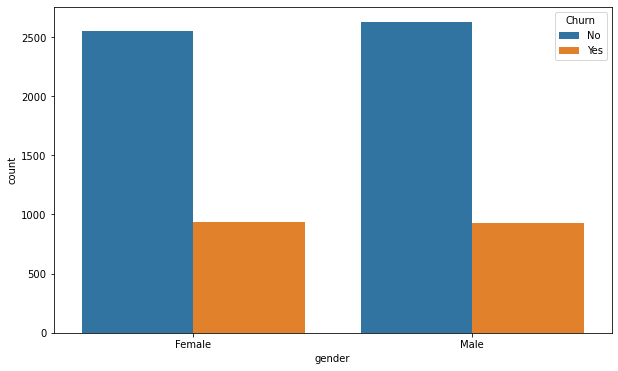

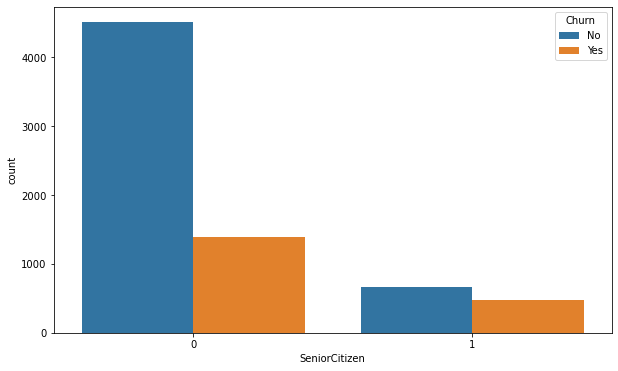

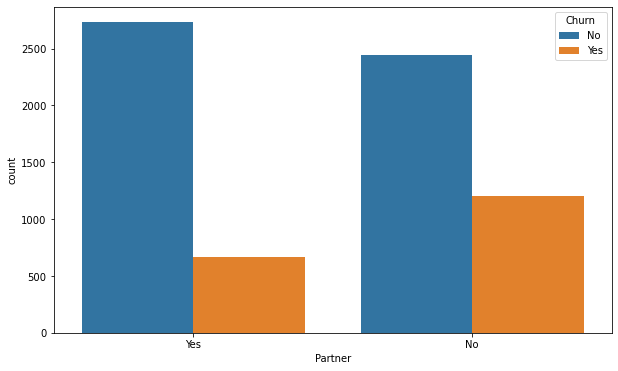

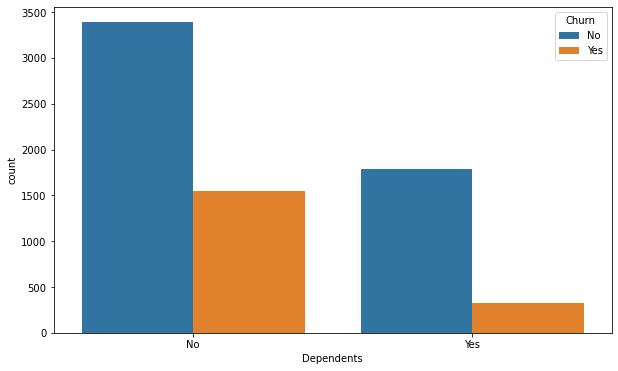

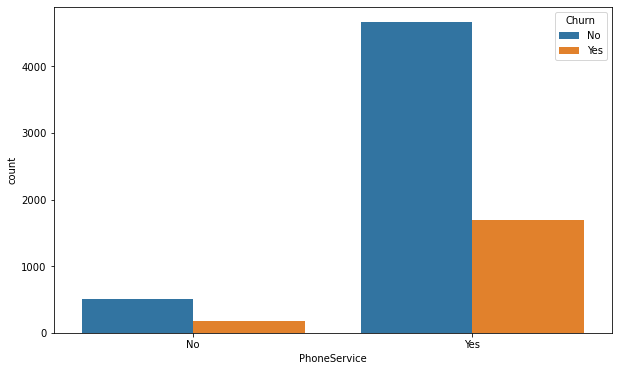

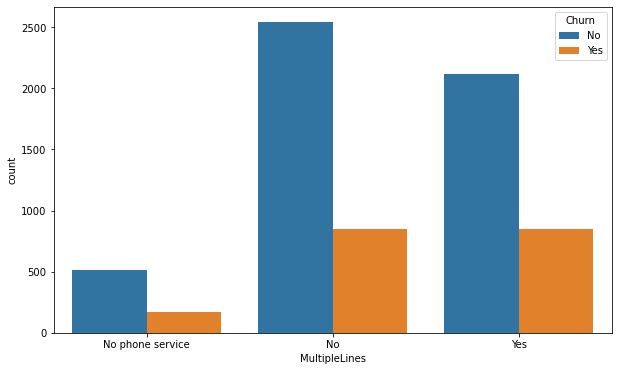

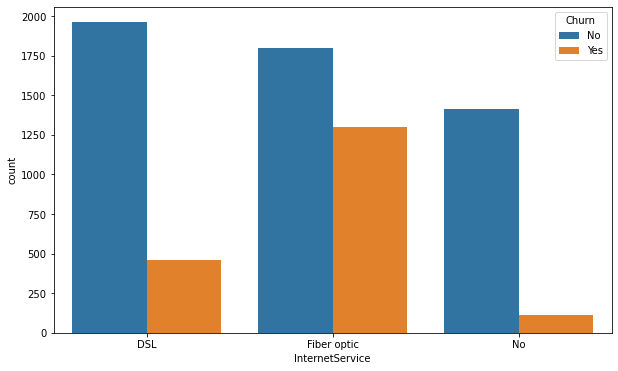

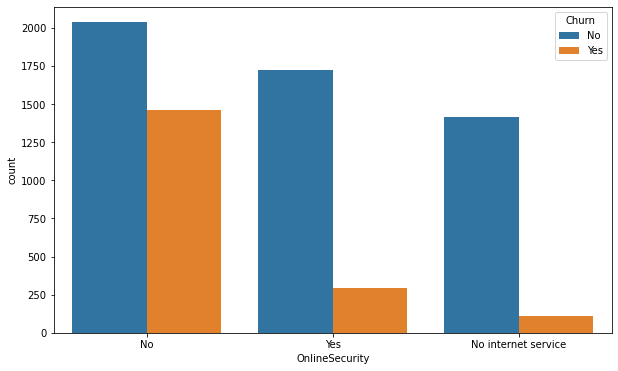

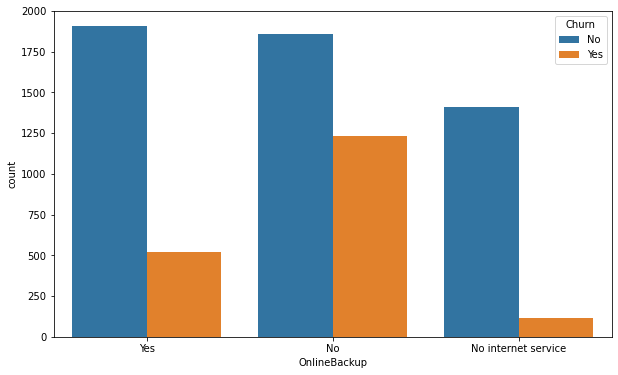

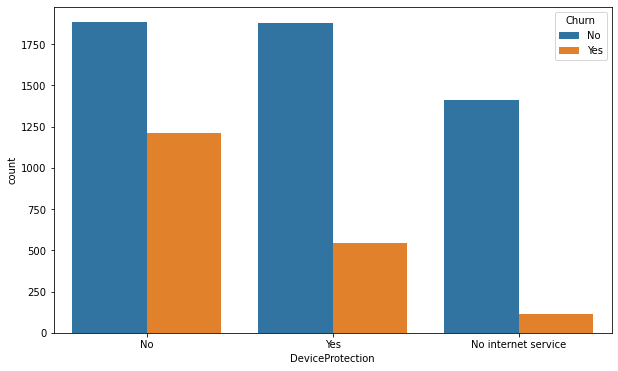

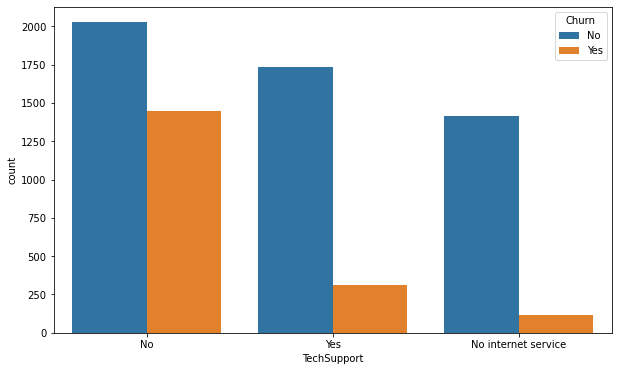

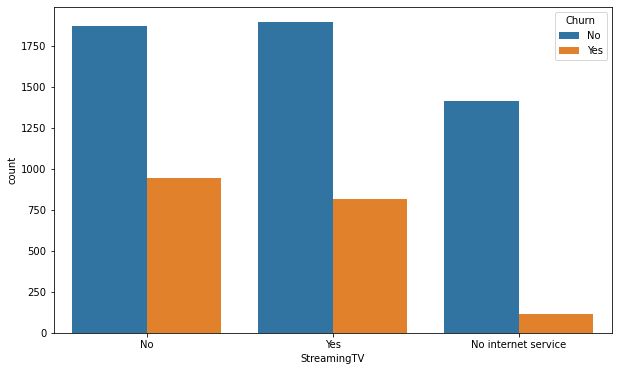

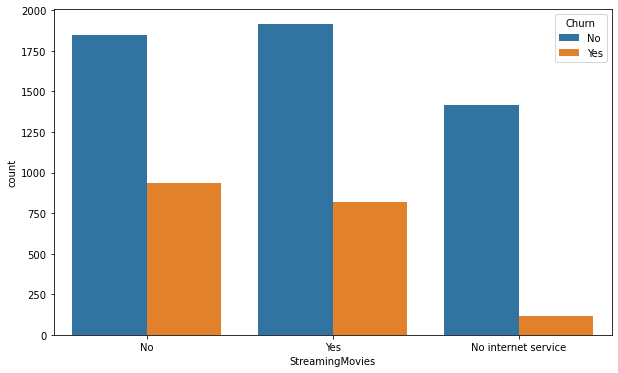

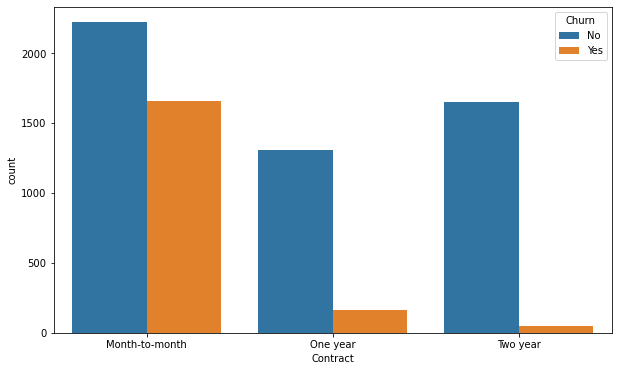

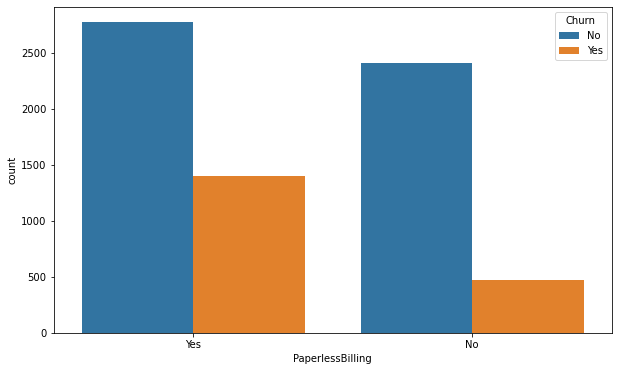

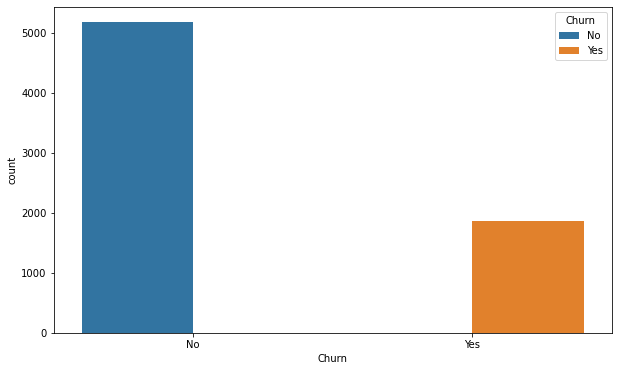

In [15]:
for i in df_cata.columns:
  plt.figure(figsize=[10,6])
  sns.countplot(x=df_cata[i],data=df_cata,hue='Churn')

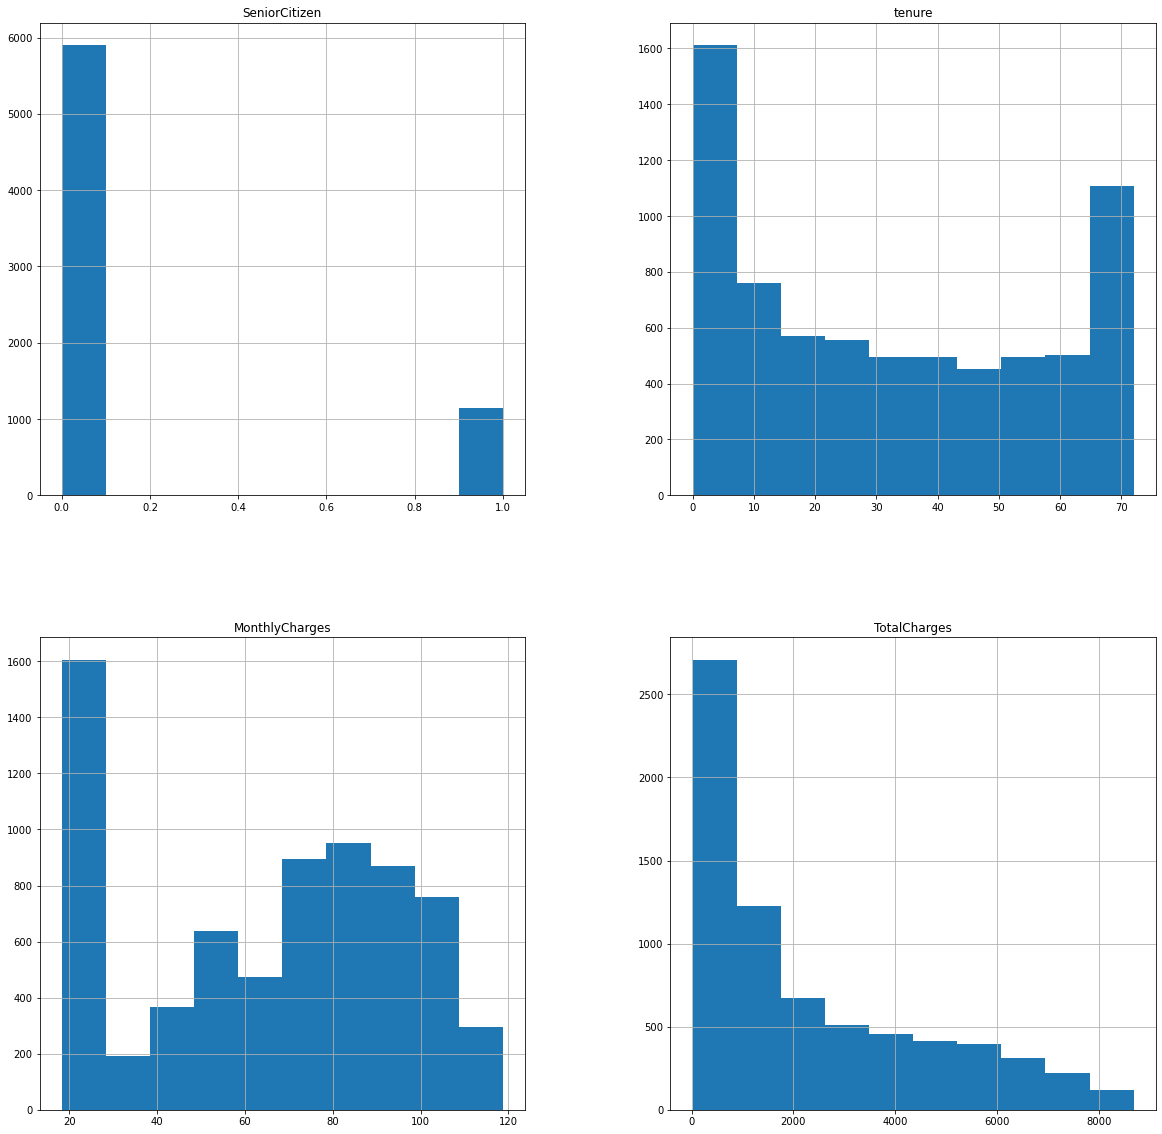

In [16]:
df.hist(figsize=(20, 20));

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

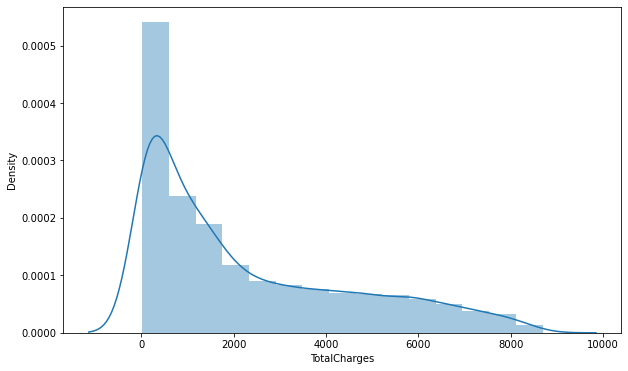

In [17]:
plt.figure(figsize = (10, 6))
sns.distplot(df['TotalCharges'], bins = 15)

In [18]:
df_corr=df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

<AxesSubplot:>

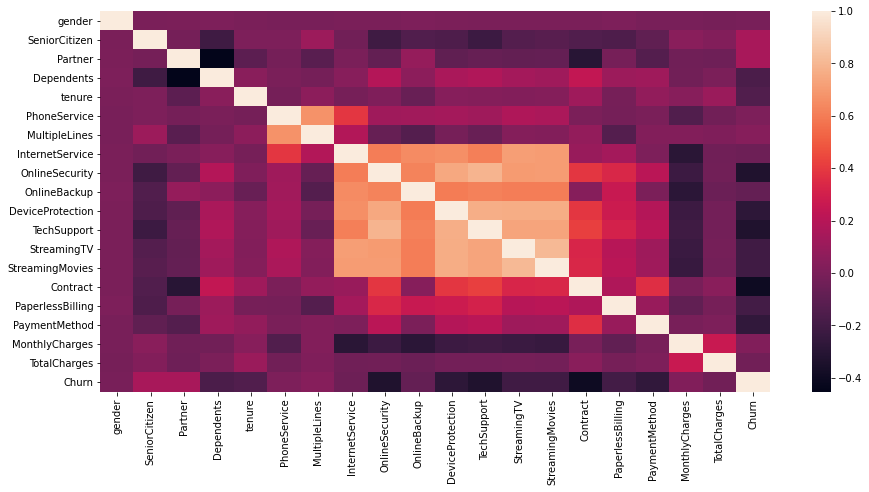

In [19]:
plt.figure(figsize=[15,7])
sns.heatmap(df_corr)


## 4. Data pre-processing

### Null Value removal

In [20]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
df['TotalCharges'].fillna(df['TotalCharges'].mode()[0], inplace=True)

### Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [23]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
df["gender"] = LabelEncoder().fit_transform(df['gender'])
df["Partner"] = LabelEncoder().fit_transform(df['Partner'])
df['Dependents'] = LabelEncoder().fit_transform(df['Dependents'])
df["PhoneService"] = LabelEncoder().fit_transform(df['PhoneService'])
df["MultipleLines"] = LabelEncoder().fit_transform(df['MultipleLines'])
df['OnlineSecurity'] = LabelEncoder().fit_transform(df['OnlineSecurity'])
df["DeviceProtection"] = LabelEncoder().fit_transform(df["DeviceProtection"])
df['StreamingTV'] = LabelEncoder().fit_transform(df['StreamingTV'])
df['InternetService'] = LabelEncoder().fit_transform(df['InternetService'])
df['PaperlessBilling'] = LabelEncoder().fit_transform(df['PaperlessBilling'])
df["OnlineBackup"] = LabelEncoder().fit_transform(df["OnlineBackup"])
df['StreamingMovies'] = LabelEncoder().fit_transform(df['StreamingMovies'])
df['Contract'] = LabelEncoder().fit_transform(df["Contract"])
df["TechSupport"] = LabelEncoder().fit_transform(df["TechSupport"])
df["PaymentMethod"] = LabelEncoder().fit_transform(df["PaymentMethod"])

In [24]:
df['Churn']=LE.fit_transform(df['Churn'])

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Removing outliers

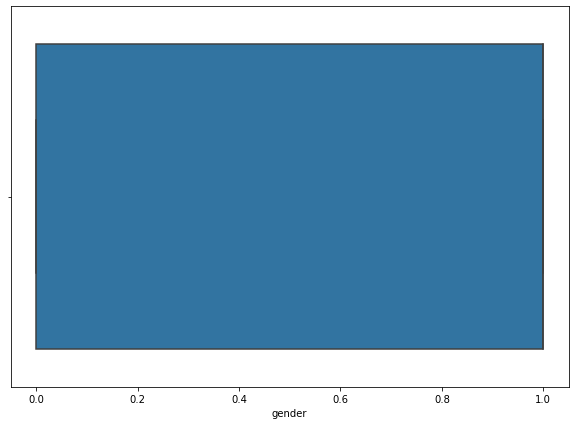

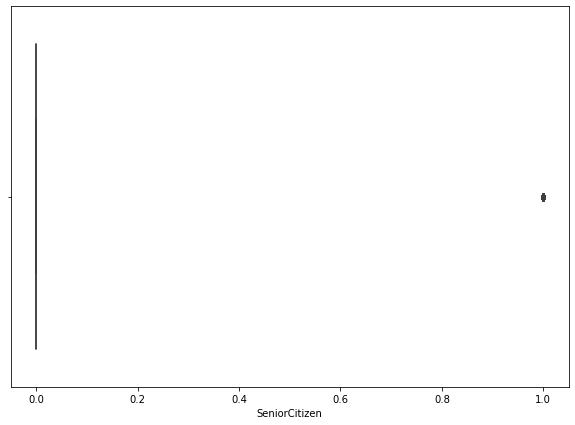

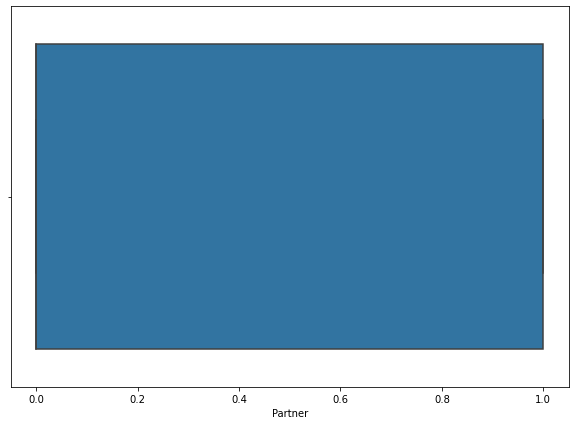

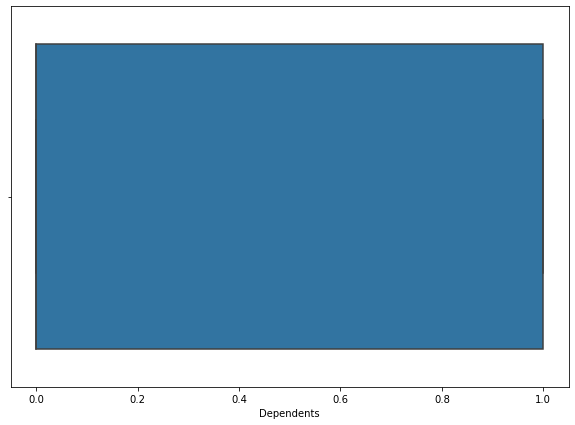

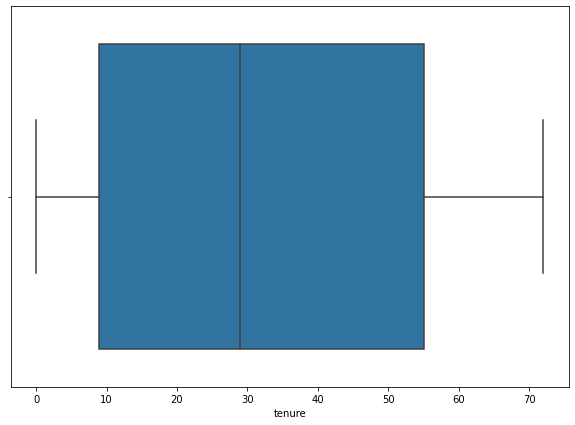

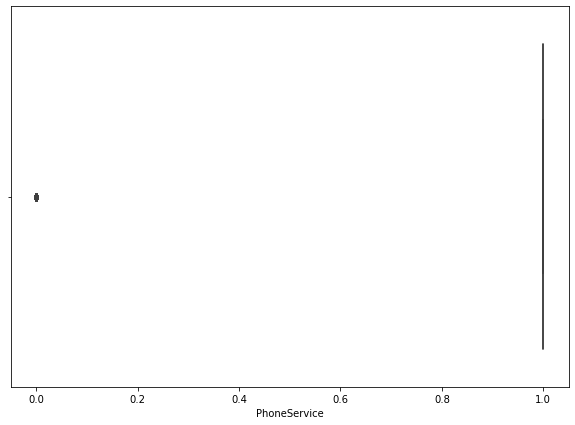

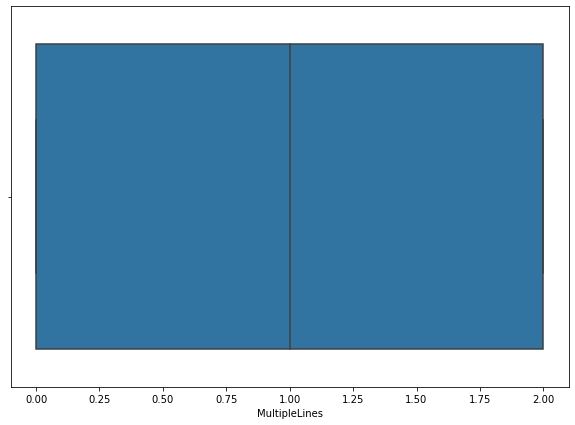

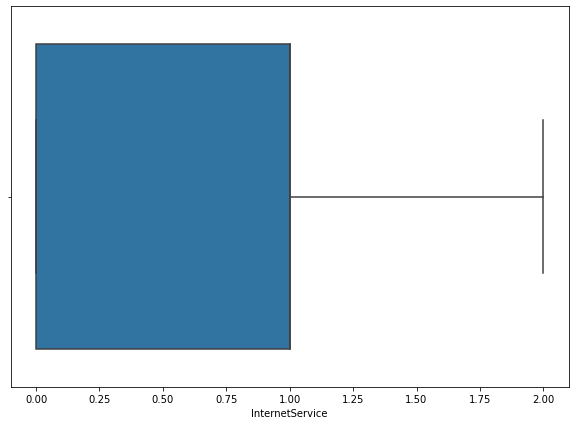

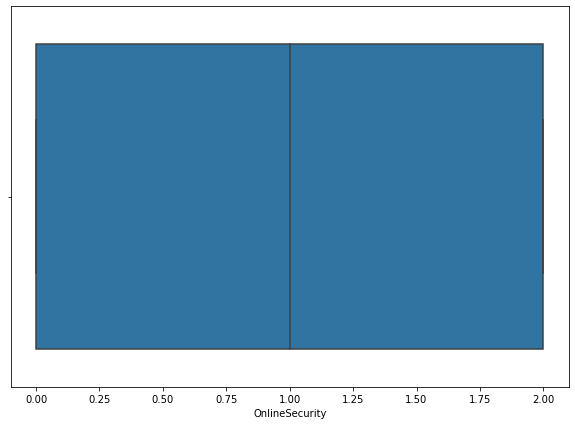

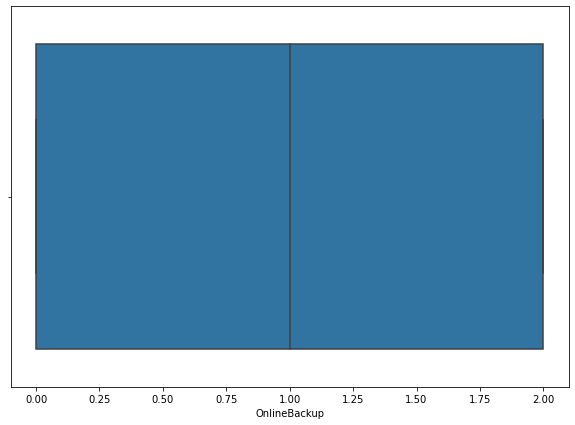

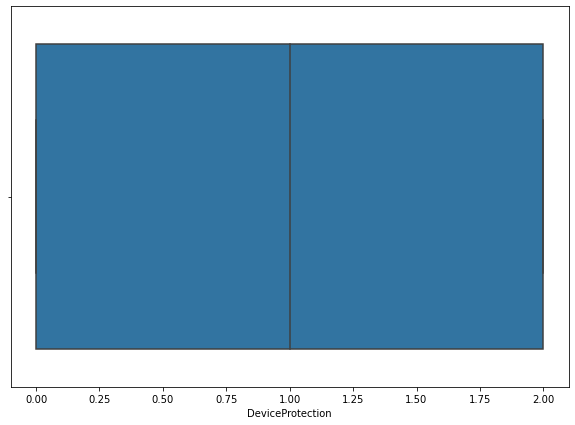

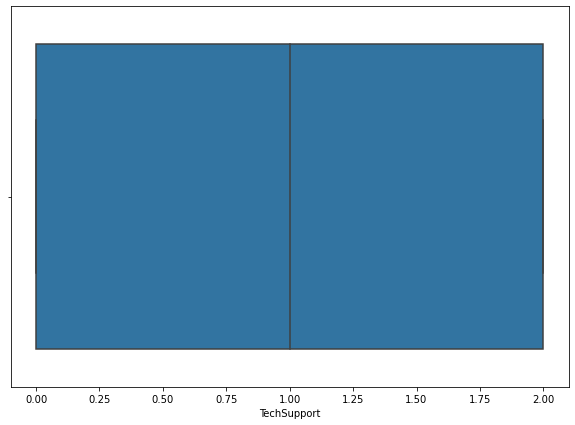

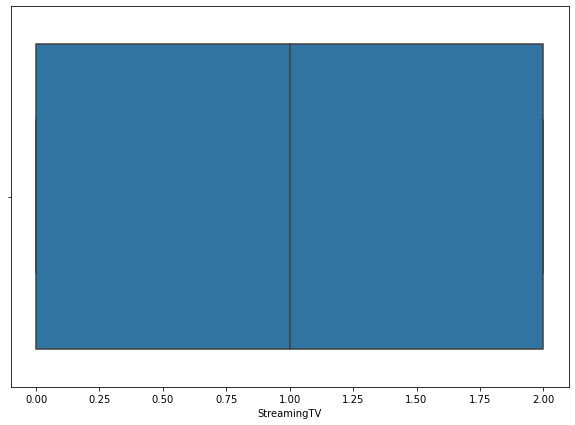

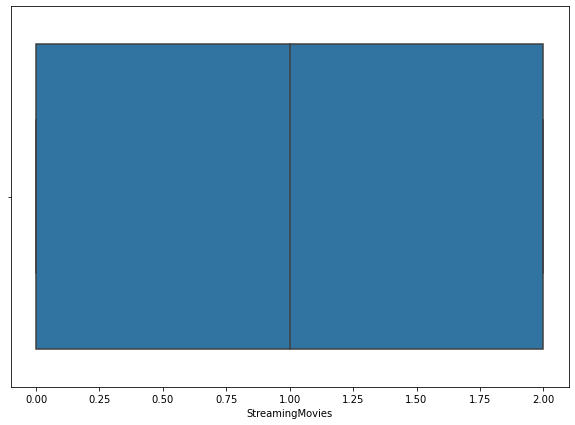

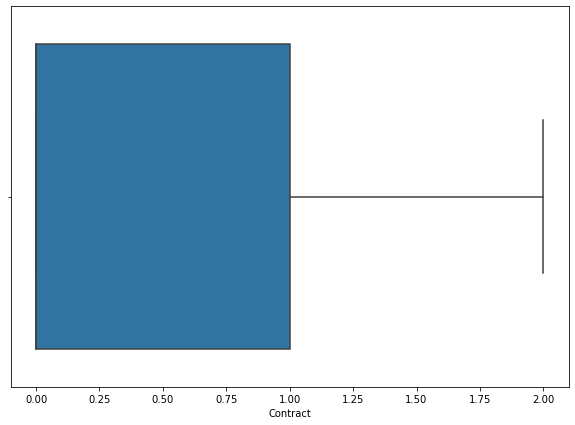

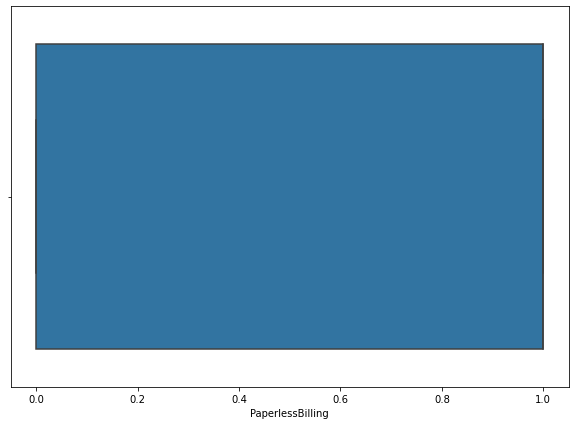

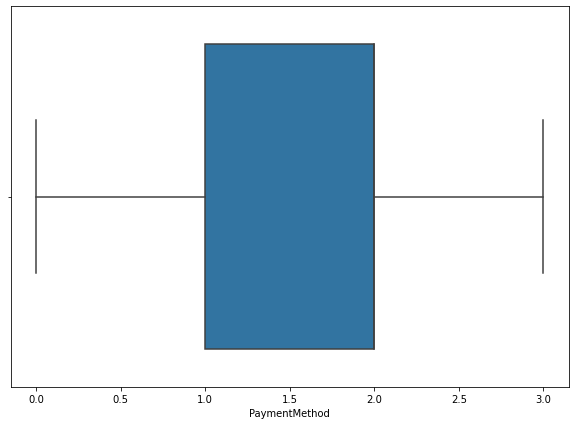

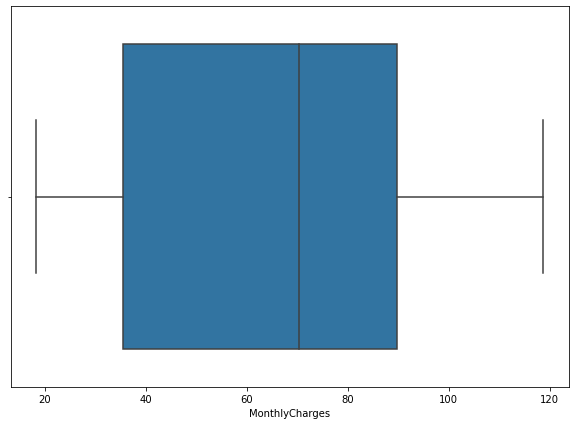

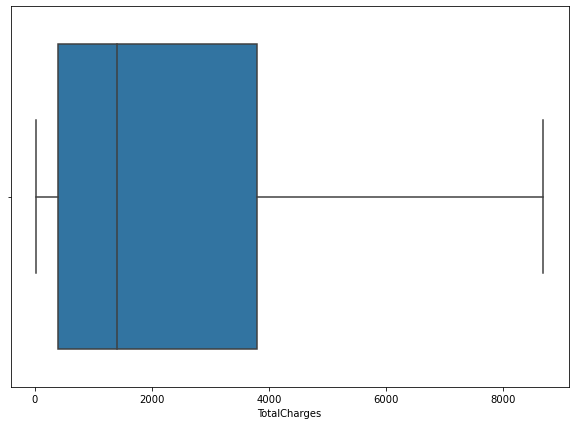

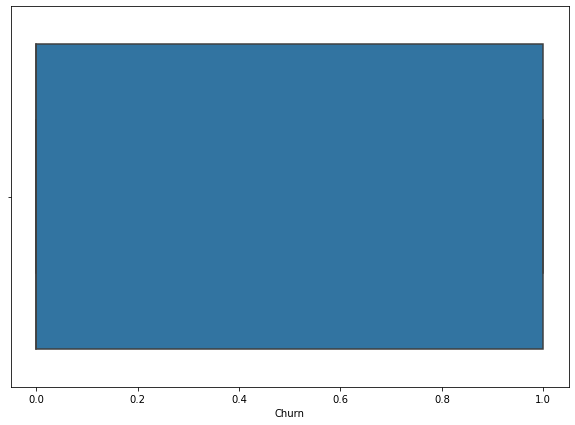

In [26]:
for i in df.columns:
    plt.figure(figsize = (10, 7))
    sns.boxplot(df[i])
    

#### Z Score _ Technique

In [27]:
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))
z.shape

(7043, 20)

In [28]:
threshold=3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [29]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(7043, 20)
(6361, 20)


In [30]:
loss_percent=(7043-6361)/7043*100
print(loss_percent)

9.683373562402386


#### Z score is removing 9.6% data  so this method is not suggested.

### Removing skewness

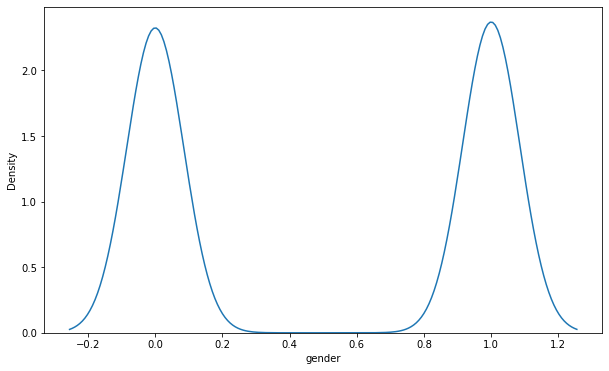

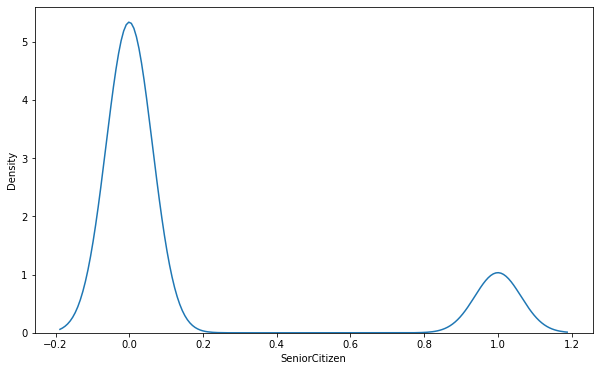

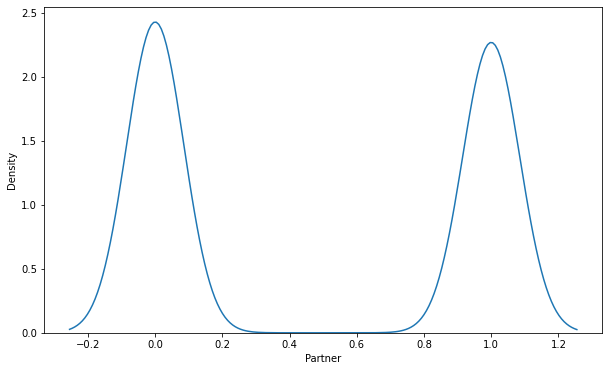

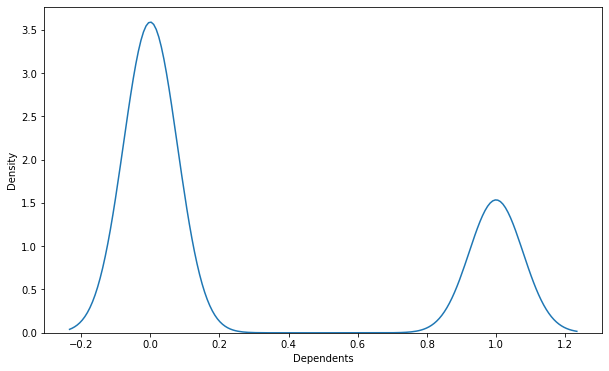

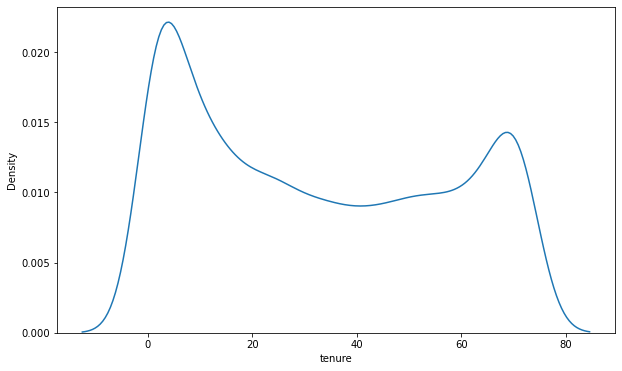

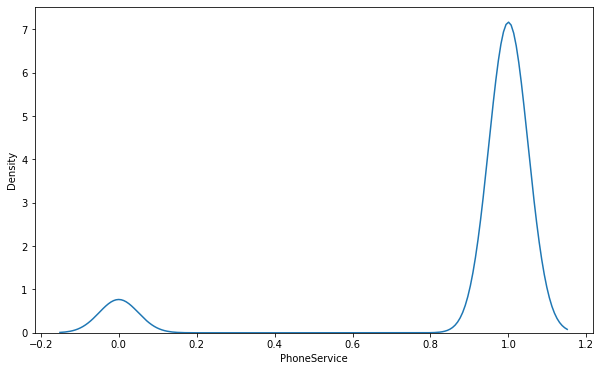

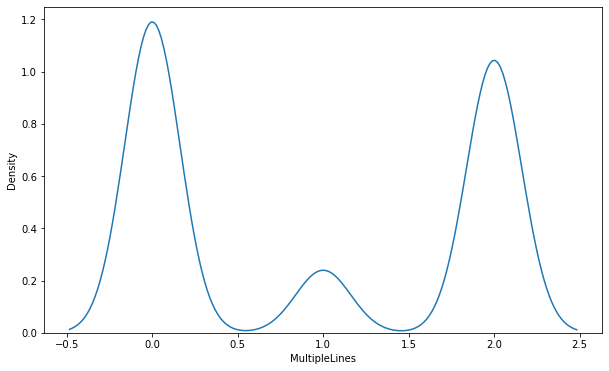

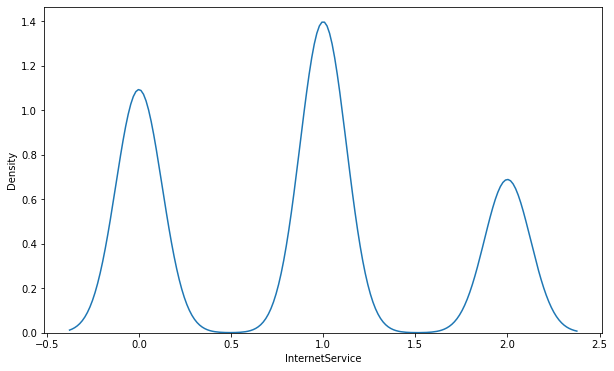

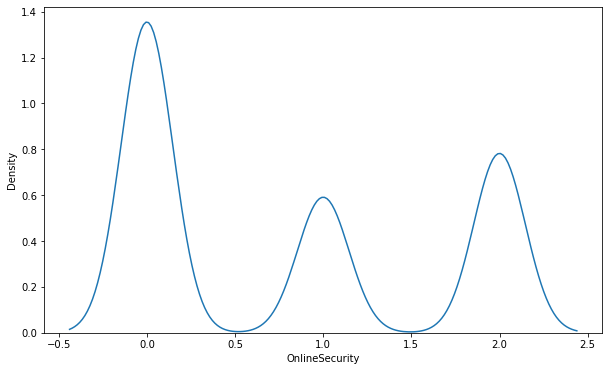

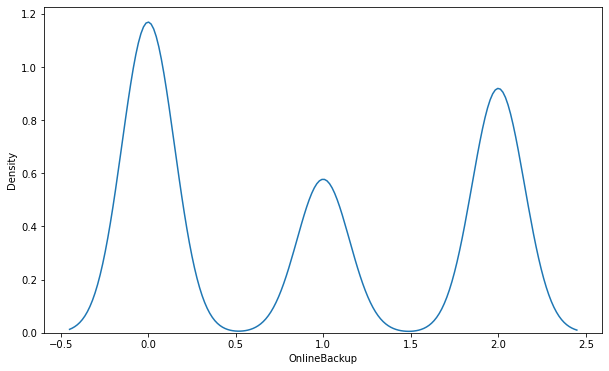

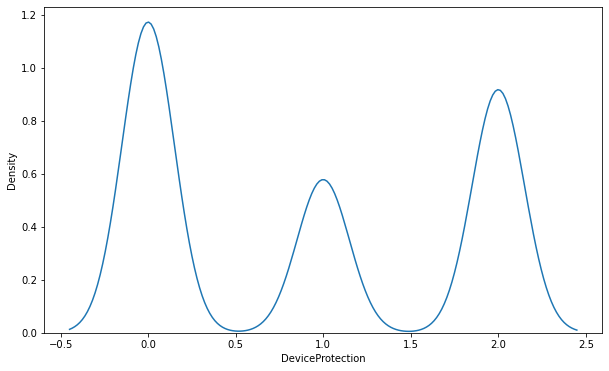

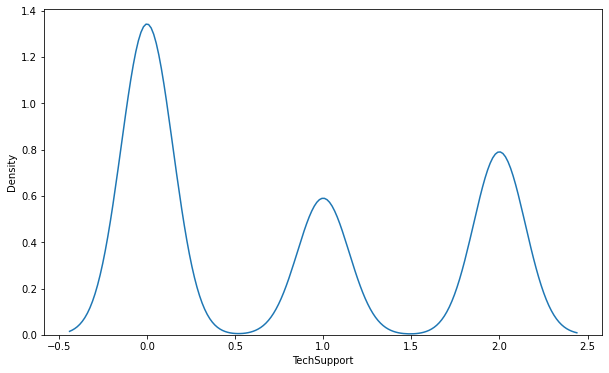

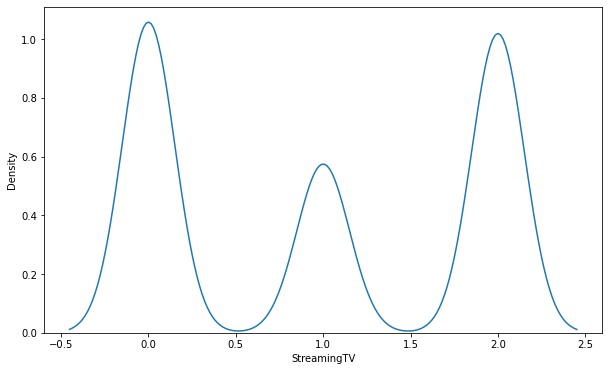

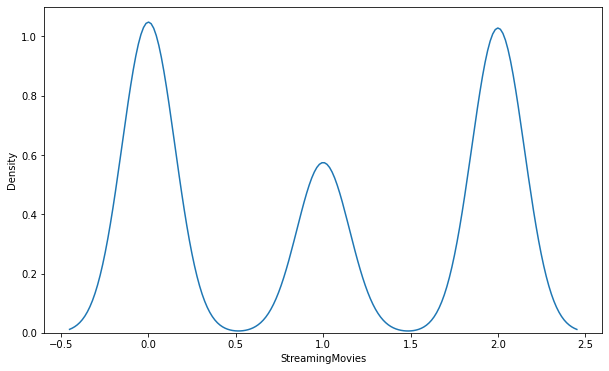

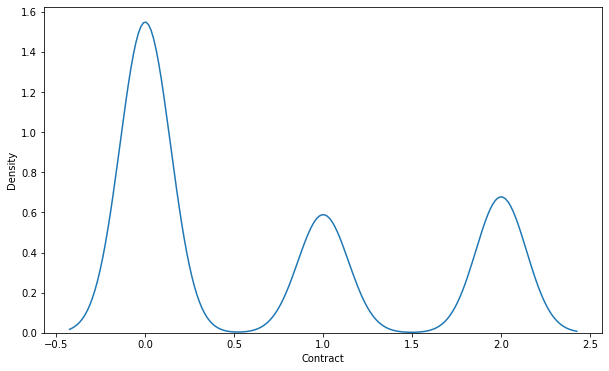

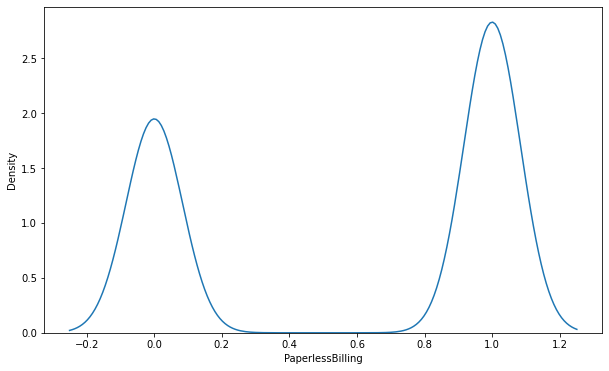

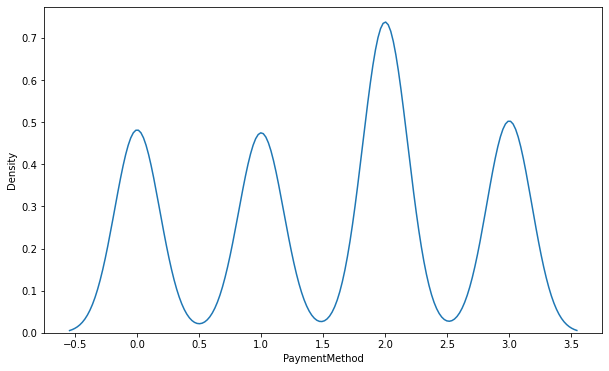

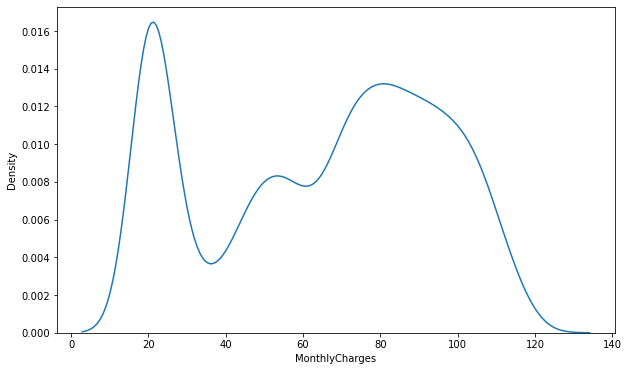

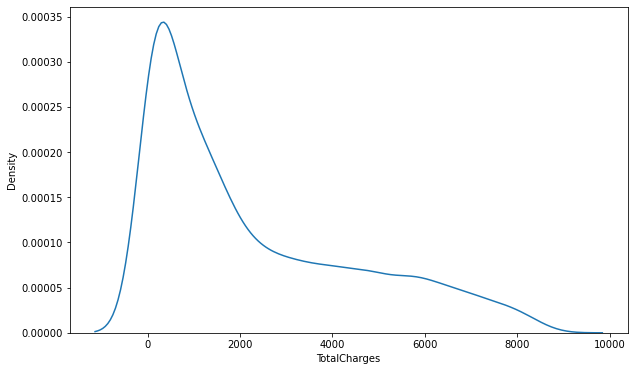

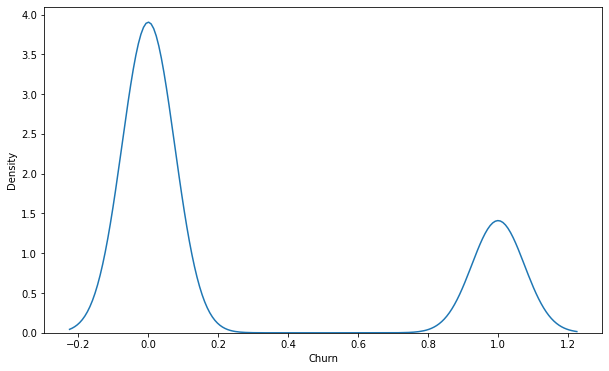

In [31]:
for i in df.columns:
    plt.figure(figsize=[10,6])
    sns.kdeplot(df[i])

In [32]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963275
Churn               1.063031
dtype: float64

There is not much skewness present in the data.

In [33]:
x= df.drop(columns='Churn')
y= df['Churn']
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [34]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

### Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(x)

## 5.train test split

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [37]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=101)

### Finding best Random State

In [38]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
d=5
for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
  DTC.fit(x_train,y_train)
  pred_train=DTC.predict(x_train)
  pred_test = DTC.predict(x_test)
  a=r2_score(y_train,pred_train)
  b=r2_score(y_test,pred_test)
  c=a-b
  print(i,c)
  if d>=c:
    d=c
    print("least value",i,d)

0 1.4217078929424165
least value 0 1.4217078929424165
1 1.413487686092374
least value 1 1.413487686092374
2 1.3515299677671893
least value 2 1.3515299677671893
3 1.3853942629157674
4 1.455075580175234
5 1.4341346504086459
6 1.4653032155142809
7 1.266797693037244
least value 7 1.266797693037244
8 1.4193083448274022
9 1.3683132092942487
10 1.41027203453111
11 1.278853402457485
12 1.391696121458384
13 1.3960069946549631
14 1.4450368995773148
15 1.3601178607326645
16 1.389692044878398
17 1.3353553435945327
18 1.3276240928048344
19 1.347193891817656
20 1.4248921612662422
21 1.4623575628347774
22 1.4434640817039865
23 1.3310357987106722
24 1.3808018077393815
25 1.2835127532719712
26 1.3995924143538496
27 1.3577031569768299
28 1.4231563641656892
29 1.379956796497077
30 1.322205420071968
31 1.4450553740307002
32 1.455203867261596
33 1.3820821961260723
34 1.3841799808651412
35 1.3982551110993557
36 1.338715343736013
37 1.2950909835058897
38 1.2143169044391122
least value 38 1.2143169044391122
3

In [39]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=66)

## 6.Model Construction

## 1.RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
model_rfc = RandomForestClassifier(n_estimators = 200)

# feeding the training set into the model
model_rfc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_rfc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_rfc.score(x_train, y_train))
print("Testing accuracy :", model_rfc.score(x_test, y_test))

Training accuracy : 0.9979716024340771
Testing accuracy : 0.7998106956933271


In [41]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1561
           1       0.65      0.50      0.56       552

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113

[[1416  145]
 [ 278  274]]


#### cross validation

In [42]:
#Now lets try to do some evaluation for random forest model using cross validation.
from sklearn.model_selection import GridSearchCV, cross_val_score
rfc_cv = cross_val_score(estimator = model_rfc, X = x_train, y = y_train, cv = 5)
rfc_cv.mean()

0.7900608519269777

### 2.LogisticRegression

In [43]:
from sklearn.linear_model import LogisticRegression
# creating the model
model_lg = LogisticRegression()

# feeding the training set into the model
model_lg.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_lg.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_lg.score(x_train, y_train))
print("Testing accuracy :", model_lg.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.8062880324543611
Testing accuracy : 0.807382867960246
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1561
           1       0.67      0.51      0.58       552

    accuracy                           0.81      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.80      0.81      0.80      2113

[[1426  135]
 [ 272  280]]


#### cross validation

In [44]:
from sklearn.model_selection import GridSearchCV, cross_val_score
lg_cv=cross_val_score(model_lg,x,y,scoring='accuracy', cv = 3).mean()
lg_cv

0.80647482849903

### 3.SVC

In [45]:
from sklearn.svm import SVC

# creating the model
model_svc = SVC()

# feeding the training set into the model
model_svc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_svc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_svc.score(x_train, y_train))
print("Testing accuracy :", model_svc.score(x_test, y_test))

Training accuracy : 0.8267748478701825
Testing accuracy : 0.7941315664931378


In [46]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1561
           1       0.65      0.46      0.54       552

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113

[[1426  135]
 [ 300  252]]


### cross validation

In [47]:
svc_cv = cross_val_score(estimator = model_svc, X = x_train, y = y_train, cv = 10)
svc_cv.mean()

0.8002028397565925

### 4.DecisionTreeClassifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model_dt = DecisionTreeClassifier()

# feeding the training set into the model
model_dt.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_dt.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_dt.score(x_train, y_train))
print("Testing accuracy :", model_dt.score(x_test, y_test))

Training accuracy : 0.9979716024340771
Testing accuracy : 0.7468054898248935


In [49]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1561
           1       0.52      0.51      0.51       552

    accuracy                           0.75      2113
   macro avg       0.67      0.67      0.67      2113
weighted avg       0.75      0.75      0.75      2113

[[1297  264]
 [ 271  281]]


#### cross validation

In [50]:
#Now lets try to do some evaluation for decision tree model using cross validation.

dt_cv = cross_val_score(estimator = model_dt, X = x_train, y = y_train, cv = 10)
dt_cv.mean()

0.7241379310344827

### 5.GaussianNB

In [51]:
from sklearn.naive_bayes import GaussianNB
# creating model
model_gnb = GaussianNB()

# feeding the training set into the model
model_gnb.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_gnb.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_gnb.score(x_train, y_train))
print("Testing accuracy :", model_gnb.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 0.7606490872210954
Testing accuracy : 0.7610033128253668
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1561
           1       0.53      0.71      0.61       552

    accuracy                           0.76      2113
   macro avg       0.71      0.74      0.72      2113
weighted avg       0.79      0.76      0.77      2113

[[1216  345]
 [ 160  392]]
accuracy_score : 0.7610033128253668


#### C-V Score

In [52]:
#Now lets try to do some evaluation for GaussianNB model using cross validation.
gnb_cv = cross_val_score(estimator = model_gnb, X = x_train, y = y_train, cv = 10)
gnb_cv.mean()

0.760446247464503

### 6.KNeighborsClassifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier
# creating model
model_KNc = KNeighborsClassifier(n_neighbors=7)

# feeding the training set into the model
model_KNc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_KNc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_KNc.score(x_train, y_train))
print("Testing accuracy :", model_KNc.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 0.8229208924949291
Testing accuracy : 0.7728348319924279
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1561
           1       0.57      0.53      0.55       552

    accuracy                           0.77      2113
   macro avg       0.70      0.69      0.70      2113
weighted avg       0.77      0.77      0.77      2113

[[1342  219]
 [ 261  291]]
accuracy_score : 0.7728348319924279


#### c-v score

In [54]:
knn_cv=cross_val_score(model_KNc,x,y,scoring='accuracy', cv = 10)
knn_cv.mean()

0.7689891602192133

In [55]:
print('MODEL',"             ",'Accurancy score','      ','C_V Score','     ','Difference')
print("LOGISTIC REGG    ",model_lg.score(x_test, y_test),"      ",round(lg_cv.mean(),2),"      ", round(model_lg.score(x_test, y_test)-lg_cv.mean(),3))
print("RANDOM FOREST    ",model_rfc.score(x_test, y_test),"      ",round(rfc_cv.mean(),2),"     ", round(model_rfc.score(x_test, y_test)-rfc_cv.mean(),3))
print("SVC              ",model_svc.score(x_test, y_test),"      ",round(svc_cv.mean(),2),"      ", round(model_svc.score(x_test, y_test)-svc_cv.mean(),3))
print("DTREE            ",model_rfc.score(x_test, y_test),"      ",round(dt_cv.mean(),2),"     ", round(model_dt.score(x_test, y_test)-dt_cv.mean(),3))
print('KNeighborsclass  ',model_KNc.score(x_test, y_test),"      ",round(knn_cv.mean(),2),"      ",round(model_KNc.score(x_test, y_test)-knn_cv.mean(),3)) 
print('GaussianNB',"      ",model_gnb.score(x_test, y_test),"      ",round(gnb_cv.mean(),2),"     ",round(model_gnb.score(x_test, y_test)-gnb_cv.mean(),3))

MODEL               Accurancy score        C_V Score       Difference
LOGISTIC REGG     0.807382867960246        0.81        0.001
RANDOM FOREST     0.7998106956933271        0.79       0.01
SVC               0.7941315664931378        0.8        -0.006
DTREE             0.7998106956933271        0.72       0.023
KNeighborsclass   0.7728348319924279        0.77        0.004
GaussianNB        0.7610033128253668        0.76       0.001


The best model accoding to accuracy score- cross validation score is RandomForestClassifier,DecisionTreeClassifie since it is having least difference

## 7.Hyper parameter tuning

## RandomForestClassifier

In [56]:
#With Hyper Parameters Tuning
#2-2,Randomforest
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model1.fit(x_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(x_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))
rf_final=prediction
rf_finalmod=model1

Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 20, 'n_jobs': -1, 'random_state': 123}
Accuracy: 0.8031235210601041
Confusion Metrix:
 [[1425  280]
 [ 136  272]]


In [57]:
clf= RandomForestClassifier(criterion= 'entropy',min_samples_leaf= 3,random_state= 123,n_jobs= -1)
clf.fit(x_train, y_train)
predRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,predRFC)
randomforest_accu
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))
print(randomforest_accu)

[[1427  134]
 [ 274  278]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1561
           1       0.67      0.50      0.58       552

    accuracy                           0.81      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.80      0.81      0.80      2113

0.8069096071935636


In [58]:
randomforest_cv= cross_val_score(clf,x,y,scoring='accuracy', cv = 3).mean()
randomforest_cv

0.8006532437049775

## 2. DecisionTreeClassifier

In [59]:
from sklearn.model_selection import GridSearchCV
parameter ={ 'max_depth': np.arange(2,10),'criterion':['gini','entropy'],'splitter':['best', 'random']}

In [60]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [61]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ['best', 'random']})

In [62]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 7, 'splitter': 'best'}

In [63]:
parameters_DT = {'max_depth': [6,7,8,9,10],
'min_samples_leaf': [2,3,4,5,6,7],
'min_samples_split': [2,3,4,5,6,7]}

In [64]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters_DT,cv=5)

In [65]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]})

In [66]:
GCV.best_params_

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 7}

In [67]:
final_mod=DecisionTreeClassifier(criterion='gini',splitter= 'best',max_depth=10,min_samples_leaf= 2, min_samples_split= 3)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.7770941788925698


### cross validation score

In [68]:
from sklearn.model_selection import cross_val_score
dtc_cv=cross_val_score(final_mod,x,y,scoring='accuracy', cv = 10).mean()
dtc_cv

0.7688507414571244

The best model is Random Forest Classifier with 80% accuracy.

# 8.Evaluation

### AUC-ROC curve

In [69]:
# train model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# RandomForestClassifier
model1 = RandomForestClassifier()
# DecisionTreeClassifier
model2 = DecisionTreeClassifier()

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)

In [70]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [71]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.8250244872759008 0.6693353155260935


#### The best model is Random Forest Classifier.

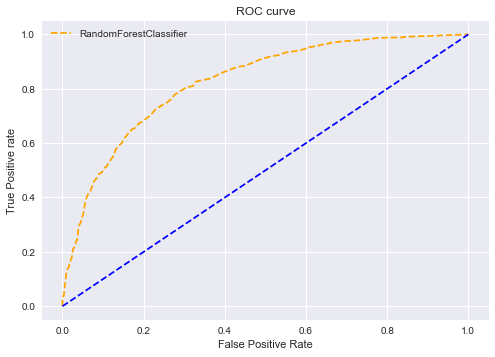

In [72]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### 9.Saving The Model

In [73]:
import joblib
joblib.dump(predRFC,"final model.pkl")

['final model.pkl']